In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#read in file
dfWW = pd.read_csv('/Users/samanthatraversi/Documents/CleanWWData.csv')
dfWW.dataframeName = 'WW'

In [3]:
#Preliminary exploration of the data
dfWW.shape

(7340, 13)

In [4]:
dfWW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7340 entries, 0 to 7339
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epaid                 7340 non-null   object 
 1   sample_id             7340 non-null   object 
 2   date                  7340 non-null   object 
 3   county                7340 non-null   object 
 4   zipcode               7340 non-null   int64  
 5   probable_cases        7340 non-null   int64  
 6   vaccine_equity        7340 non-null   int64  
 7   pop_fully_vaccinated  7340 non-null   float64
 8   pop_part_vaccinated   7340 non-null   float64
 9   population_served     7340 non-null   int64  
 10  sample_matrix         7340 non-null   object 
 11  pcr_type              7340 non-null   object 
 12  pcr_target_avg_conc   7340 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 745.6+ KB


In [5]:
dfWW['zipcode'] = dfWW['zipcode'].astype(object)

In [6]:
dfWW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7340 entries, 0 to 7339
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   epaid                 7340 non-null   object 
 1   sample_id             7340 non-null   object 
 2   date                  7340 non-null   object 
 3   county                7340 non-null   object 
 4   zipcode               7340 non-null   object 
 5   probable_cases        7340 non-null   int64  
 6   vaccine_equity        7340 non-null   int64  
 7   pop_fully_vaccinated  7340 non-null   float64
 8   pop_part_vaccinated   7340 non-null   float64
 9   population_served     7340 non-null   int64  
 10  sample_matrix         7340 non-null   object 
 11  pcr_type              7340 non-null   object 
 12  pcr_target_avg_conc   7340 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 745.6+ KB


In [7]:
dfWW.describe()

,probable_cases,vaccine_equity,pop_fully_vaccinated,pop_part_vaccinated,population_served,pcr_target_avg_conc
count,7340.000000,7340.000000,7340.000000,7340.000000,7.340000e+03,7.340000e+03
mean,314.341281,2.977929,0.616174,0.081561,8.079963e+05,1.736787e+05
std,877.878736,1.028973,0.249441,0.106717,1.039373e+06,3.648874e+05
min,0.000000,1.000000,0.000000,0.000000,3.272000e+03,0.000000e+00
25%,22.000000,3.000000,0.518193,0.047398,1.530000e+05,1.493550e+04
50%,57.000000,3.000000,0.684597,0.064177,2.360000e+05,4.875400e+04
75%,226.000000,4.000000,0.791278,0.082096,1.480000e+06,1.952188e+05
max,15885.000000,4.000000,1.000000,0.978859,4.000000e+06,1.320746e+07


In [8]:
#Check if there are any missing values in any attributes
msval = dfWW.isna().sum()
print(msval)

epaid                   0
sample_id               0
date                    0
county                  0
zipcode                 0
probable_cases          0
vaccine_equity          0
pop_fully_vaccinated    0
pop_part_vaccinated     0
population_served       0
sample_matrix           0
pcr_type                0
pcr_target_avg_conc     0
dtype: int64


In [9]:
#Find variables with highest correlations
corr_matrix = dfWW.corr()
print(corr_matrix["pcr_target_avg_conc"].sort_values(ascending=False))

pcr_target_avg_conc     1.000000
probable_cases          0.191125
pop_fully_vaccinated    0.156368
pop_part_vaccinated    -0.008052
population_served      -0.035352
vaccine_equity         -0.085665
Name: pcr_target_avg_conc, dtype: float64


In [14]:
#Visualize the correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plats shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

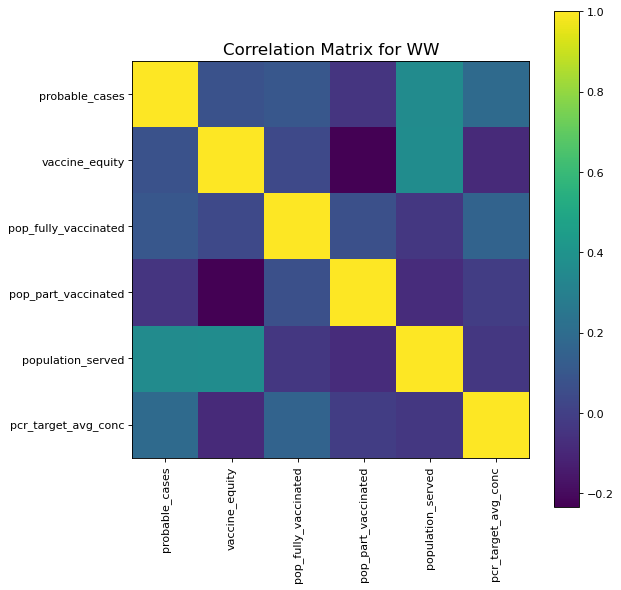

In [15]:
plotCorrelationMatrix(dfWW, 8)

<AxesSubplot:xlabel='pop_fully_vaccinated'>

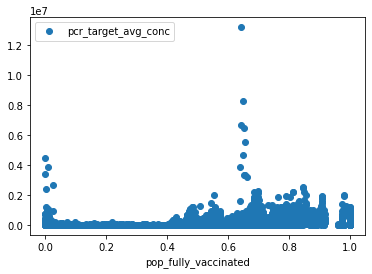

In [18]:
dfWW.plot(x='pop_fully_vaccinated', y='pcr_target_avg_conc', style='o')

<AxesSubplot:xlabel='pop_part_vaccinated'>

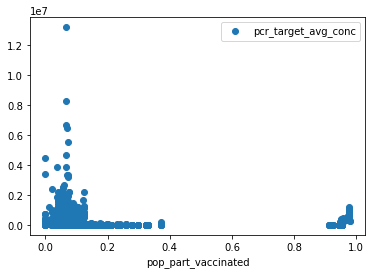

In [17]:
dfWW.plot(x='pop_part_vaccinated', y='pcr_target_avg_conc', style='o')

<AxesSubplot:xlabel='probable_cases'>

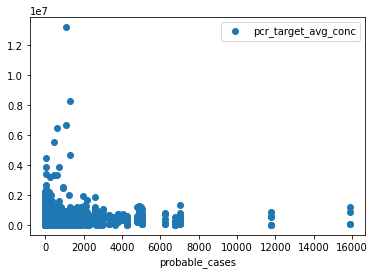

In [19]:
dfWW.plot(x='probable_cases', y='pcr_target_avg_conc', style='o')

<AxesSubplot:xlabel='vaccine_equity'>

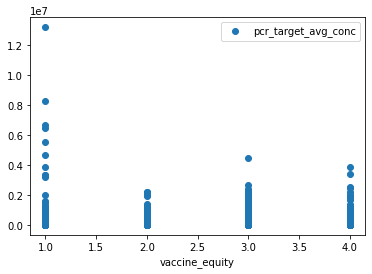

In [20]:
dfWW.plot(x='vaccine_equity', y='pcr_target_avg_conc', style='o')

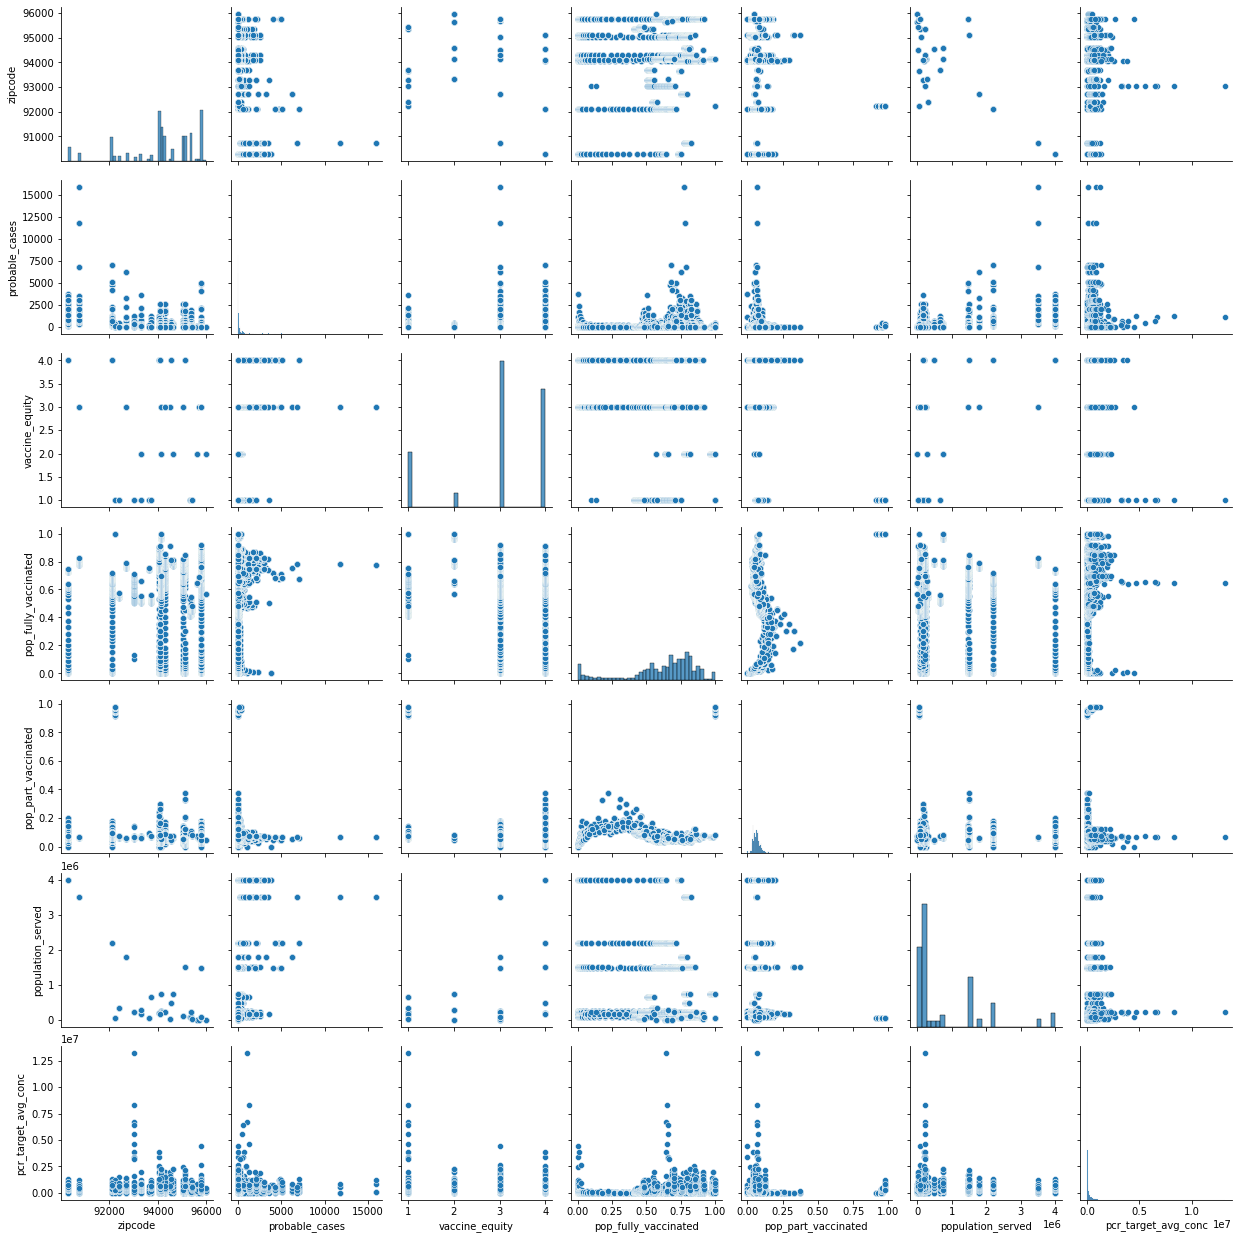

In [21]:
sns.pairplot(dfWW)

In [22]:
dfWW.loc[dfWW['pcr_target_avg_conc'].between(0, 14920, 'both'), 'class'] = 'green'
dfWW.loc[dfWW['pcr_target_avg_conc'].between(14920, 48700, 'right'), 'class'] = 'yellow'
dfWW.loc[dfWW['pcr_target_avg_conc'].between(48700, 195060, 'right'), 'class'] = 'orange'
dfWW.loc[dfWW['pcr_target_avg_conc'].between(195060, 13207458, 'right'), 'class'] = 'red'

In [23]:
dfWW.head()

,epaid,sample_id,date,county,zipcode,probable_cases,vaccine_equity,pop_fully_vaccinated,pop_part_vaccinated,population_served,sample_matrix,pcr_type,pcr_target_avg_conc,class
0,CA0109991,LASAN_Hyp442030.041,2021-01-12,Los Angeles,90293,3783,4,0.0,0.0,4000000,raw wastewater,ddpcr,217074,red
1,CA0109991,LASAN_Hyp442080.041,2021-01-12,Los Angeles,90293,3783,4,0.0,0.0,4000000,raw wastewater,ddpcr,244530,red
2,CA0109991,LASAN_Hyp442080.041,2021-01-12,Los Angeles,90293,3783,4,0.0,0.0,4000000,raw wastewater,ddpcr,266838,red
3,CA0109991,LASAN_Hyp442030.041,2021-01-12,Los Angeles,90293,3783,4,0.0,0.0,4000000,raw wastewater,ddpcr,281138,red
4,CA0109991,LASAN_Hyp442060.041,2021-01-12,Los Angeles,90293,3783,4,0.0,0.0,4000000,raw wastewater,ddpcr,729300,red


In [25]:
dfWW.groupby('class').mean()

,probable_cases,vaccine_equity,pop_fully_vaccinated,pop_part_vaccinated,population_served,pcr_target_avg_conc
class,,,,,,
green,143.280807,2.912759,0.564643,0.106731,902511.375136,6423.150491
orange,269.420708,3.032153,0.617124,0.062672,764077.235422,100256.041417
red,701.475490,2.807734,0.719839,0.083323,765834.186275,558828.490741
yellow,142.883924,3.159128,0.563004,0.073531,799636.900272,28906.099728


In [26]:
dfWW1 = dfWW.drop(['epaid'], axis = 1)

In [27]:
dfWW1.head()

,sample_id,date,county,zipcode,probable_cases,vaccine_equity,pop_fully_vaccinated,pop_part_vaccinated,population_served,sample_matrix,pcr_type,pcr_target_avg_conc,class
0,LASAN_Hyp442030.041,2021-01-12,Los Angeles,90293,3783,4,0.0,0.0,4000000,raw wastewater,ddpcr,217074,red
1,LASAN_Hyp442080.041,2021-01-12,Los Angeles,90293,3783,4,0.0,0.0,4000000,raw wastewater,ddpcr,244530,red
2,LASAN_Hyp442080.041,2021-01-12,Los Angeles,90293,3783,4,0.0,0.0,4000000,raw wastewater,ddpcr,266838,red
3,LASAN_Hyp442030.041,2021-01-12,Los Angeles,90293,3783,4,0.0,0.0,4000000,raw wastewater,ddpcr,281138,red
4,LASAN_Hyp442060.041,2021-01-12,Los Angeles,90293,3783,4,0.0,0.0,4000000,raw wastewater,ddpcr,729300,red


In [28]:
dfWW2 = dfWW1.drop(['sample_id', 'date', 'county', 'zipcode', 'pcr_type', 'pcr_target_avg_conc'], 
                   axis = 1, inplace=True)

In [31]:
dfWW1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7340 entries, 0 to 7339
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   probable_cases        7340 non-null   int64  
 1   vaccine_equity        7340 non-null   int64  
 2   pop_fully_vaccinated  7340 non-null   float64
 3   pop_part_vaccinated   7340 non-null   float64
 4   population_served     7340 non-null   int64  
 5   sample_matrix         7340 non-null   object 
 6   class                 7340 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 401.5+ KB


In [32]:
dfWW1.head()

,probable_cases,vaccine_equity,pop_fully_vaccinated,pop_part_vaccinated,population_served,sample_matrix,class
0,3783,4,0.0,0.0,4000000,raw wastewater,red
1,3783,4,0.0,0.0,4000000,raw wastewater,red
2,3783,4,0.0,0.0,4000000,raw wastewater,red
3,3783,4,0.0,0.0,4000000,raw wastewater,red
4,3783,4,0.0,0.0,4000000,raw wastewater,red


In [34]:
!pip3 install pycaret

     |████████████████████████████████| 320 kB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 43.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 25.4 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 24.9 MB/s eta 0:00:01
     |████████████████████████████████| 16.5 MB 8.8 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 21.8 MB/s eta 0:00:01
     |████████████████████████████████| 325 kB 33.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 18.5 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 8.6 MB/s  eta 0:00:01
     |████████████████████████████████| 23.4 MB 619 kB/s  eta 0:00:01
     |████████████████████████████████| 282 kB 19.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.2 MB 160 kB/s eta 0:00:011
     |████████████████████████████████| 29.1 MB 146 kB/s eta 0:00:011
     |████████████████████████████████| 7.2 MB 161 kB/s eta 0:00:011
  Installing build dependencies ... 

In [35]:
from pycaret.utils import version

In [36]:
version()

'2.2.2'

In [39]:
!pip install markupsafe==2.0.1

In [42]:
dfWW1.to_csv('Clean.csv')

In [46]:
from xgboost import XGBClassifier

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
from sklearn.metrics import accuracy_score

In [51]:
#XGBoost split data into input and output
X = dfWW1[['probable_cases', 'vaccine_equity', 'pop_fully_vaccinated', 'pop_part_vaccinated', 'population_served',
          'sample_matrix']]
Y = dfWW1['class']

In [52]:
#split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [53]:
#fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got ['green' 'orange' 'red' 'yellow']